# Face Detection with MTCNN, from Images

## Tenserflow Logging Disabling

In [1]:
import logging

logging.getLogger('tensorflow').disabled = True

## Libraries Import

In [2]:
import cv2
import matplotlib.pyplot as pyplot
import mtcnn
import numpy as np
from mtcnn import MTCNN

## Configuration

In [3]:
IMAGE_FILENAME = "images/8.jpg"
HIGHLIGHT_COLOR = (255, 0, 0)
FACE_BORDER_WIDTH = 5
KEYPOINT_CIRCLE_SIZE = 5

## Informations about the MTCNN Library

In [4]:
print("MTCNN version is {}.".format(mtcnn.__version__))

MTCNN version is 0.1.0.


## Face Recognition with MTCNN

In [5]:
def plot_image(image: np.array, title: str = None, cmap: str = None) -> None:
    pyplot.imshow(image, cmap=cmap)
    if title:
        pyplot.title(title)
    pyplot.axis("off")
    pyplot.show(cmap)

In [6]:
def detect_faces(image: np.array) -> None:
    detector = MTCNN()
    results = detector.detect_faces(image)

    labeled_image = np.copy(image)
    for result in results:
        (x, y, width, height) = result["box"]
        labeled_image = cv2.rectangle(labeled_image, (x, y), (x + width, y + height), HIGHLIGHT_COLOR, FACE_BORDER_WIDTH)

        for _, value in result["keypoints"].items():
            labeled_image = cv2.circle(labeled_image, value, radius=1, color=HIGHLIGHT_COLOR, thickness=KEYPOINT_CIRCLE_SIZE)

    plot_image(labeled_image, title="Detected Faces and Their Keypoints")

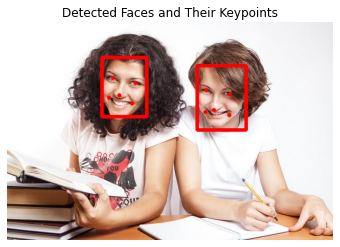

In [7]:
image = cv2.imread(IMAGE_FILENAME)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detect_faces(image)